In [1]:
%%capture
!git clone https://github.com/ultralytics/ultralytics.git
!pip install -r requirements.txt
!pip install ultralytics
!pip install onnx onnx-simplifier onnxruntime

In [2]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import random
import numpy as np
import math
import os
from ultralytics import YOLO
from IPython.display import Image
from ray import tune
from PIL import Image
import datetime
import torch
import seaborn as sns

import ultralytics
# проверка на успешную установку и импорт библиотеки ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5934.0/8062.4 GB disk)


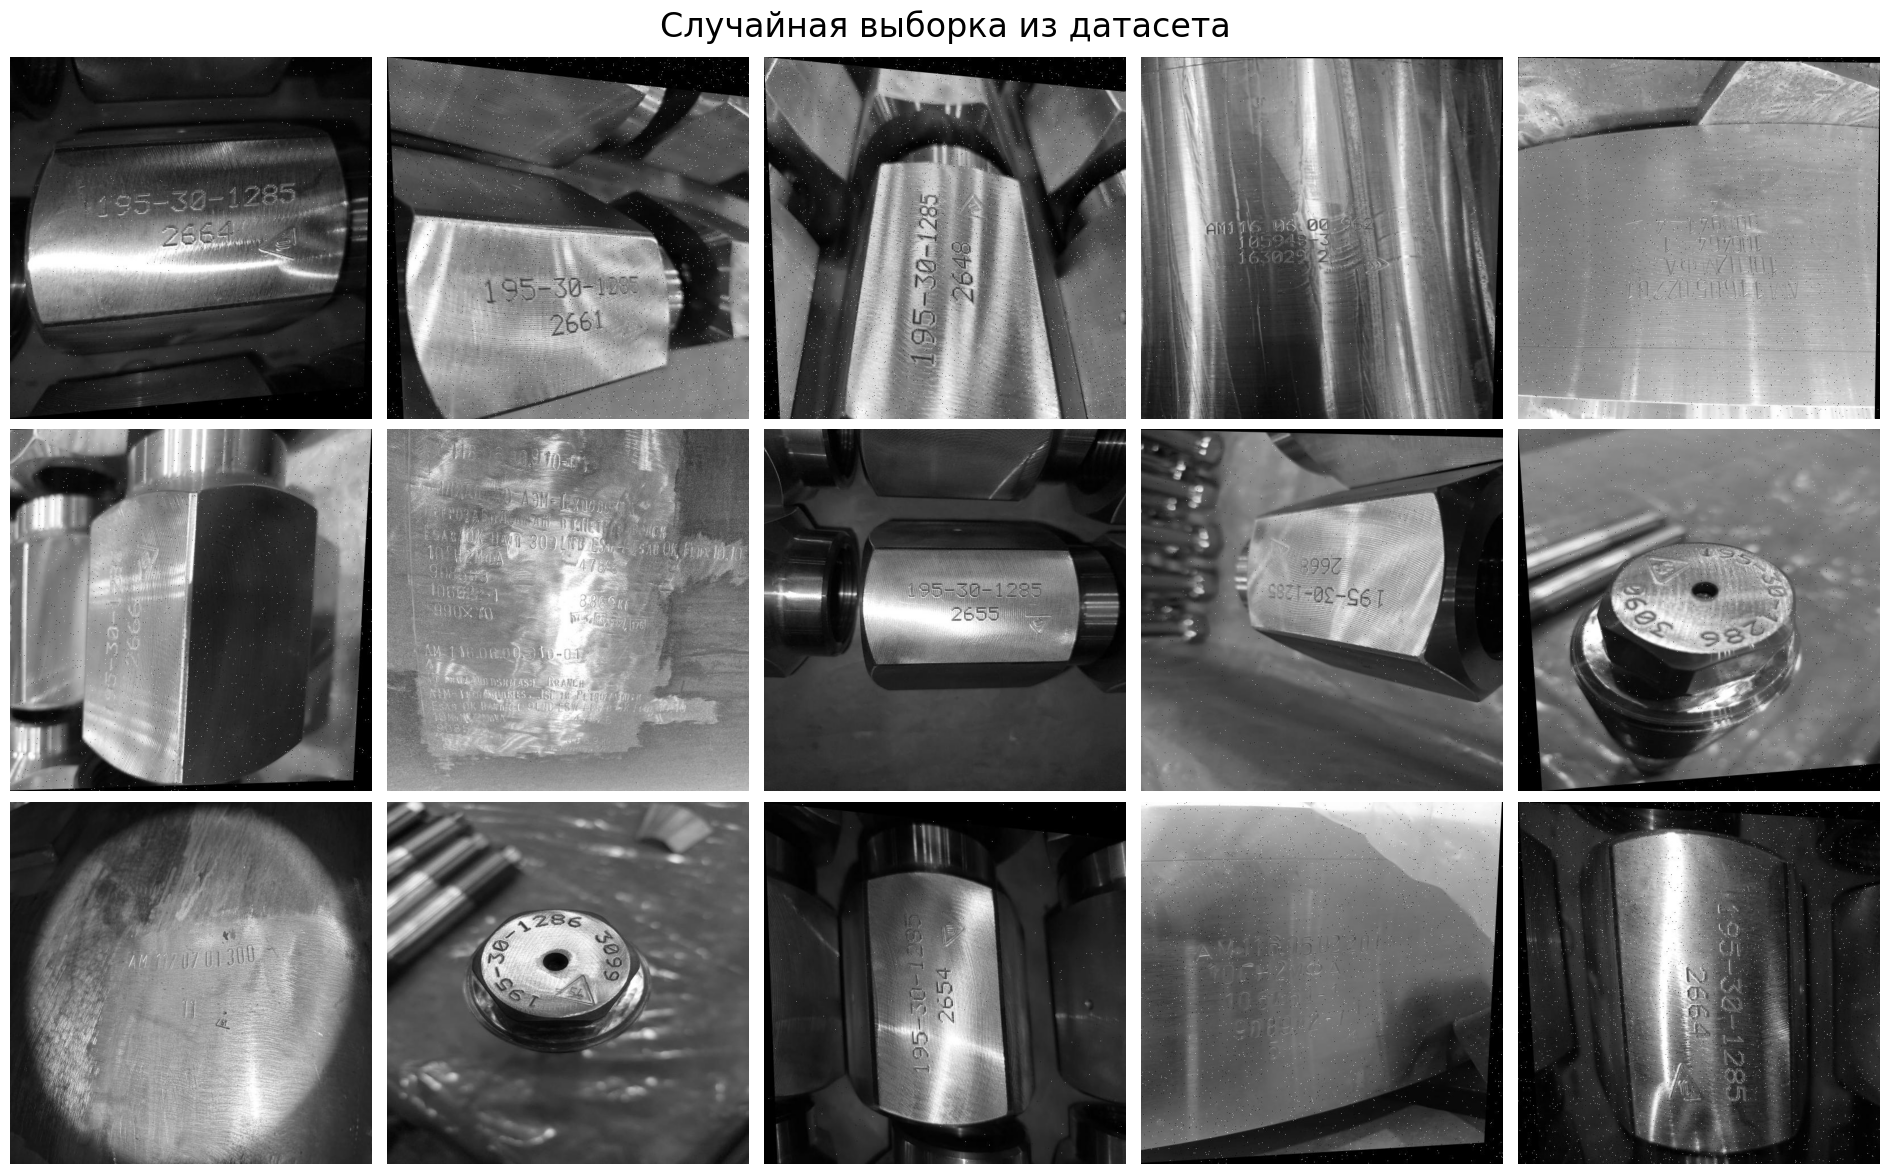

In [3]:
random.seed(15)

train_images_path = '/kaggle/input/final-dataset/train/images'
# список файлов
image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# отбор рандомных 15 файлов
random_images = random.sample(image_files, 15)

# создание фигуры
plt.figure(figsize=(19, 12))

# итерация каждого изображения
for i, image_file in enumerate(random_images):
    image_path = os.path.join(train_images_path, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Добавление названия
plt.suptitle('Случайная выборка из датасета', fontsize=24)

# Показ
plt.tight_layout()
plt.show()

# удаление ненужной переменной для освобождения памяти
del image_files

In [4]:
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 272MB/s]


In [5]:
model.train(data="/kaggle/input/final-dataset/data.yaml",
            epochs=100, device=[0, 1], batch=64, patience=1511, seed=15, optimizer='auto', dropout=0.5,
            lr0=0.001, cos_lr=True)

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/final-dataset/data.yaml, epochs=100, time=None, patience=1511, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=15, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/final-dataset/train/labels... 635 images, 0 backgrounds, 0 corrupt: 100%|██████████| 635/635 [00:02<00:00, 309.78it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/final-dataset/train is not writeable, cache not saved.


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/final-dataset/valid/labels... 31 images, 0 backgrounds, 0 corrupt:  94%|█████████▍| 31/33 [00:00<00:00, 296.42it/s]/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/final-dataset/valid/labels... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 295.41it/s]
train: Scanning /kaggle/input/final-dataset/train/labels... 266 images, 0 backgrounds, 0 corrupt:  42%|████▏     | 266/635 [00:00<00:00, 859.65it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/final-dataset/valid is not writeable, cache not saved.


train: Scanning /kaggle/input/final-dataset/train/labels... 635 images, 0 backgrounds, 0 corrupt: 100%|██████████| 635/635 [00:00<00:00, 837.15it/s]


Plotting labels to runs/detect/train/labels.jpg... 


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.61G      2.335      7.405      2.424         72        640: 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


                   all         33         34      0.105      0.147     0.0357     0.0124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.22G      2.039      5.684      2.267         66        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


                   all         33         34      0.745      0.618      0.713      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       7.6G      1.458      2.312      1.632         60        640: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


                   all         33         34      0.933      0.815        0.9      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.29G      1.319      1.508      1.448         69        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


                   all         33         34      0.878      0.735      0.791      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.29G      1.293      1.227      1.441         85        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


                   all         33         34      0.762      0.912      0.887      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.29G      1.267      1.081      1.448         62        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


                   all         33         34      0.829      0.859      0.921      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.29G      1.301      1.008        1.4         55        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


                   all         33         34      0.502      0.471      0.517      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.29G      1.337      1.057      1.434         63        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


                   all         33         34      0.666      0.529      0.622      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.29G       1.36      1.013      1.458         66        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


                   all         33         34      0.889      0.471      0.572      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.29G       1.38      1.045      1.471         68        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


                   all         33         34     0.0668      0.265     0.0296    0.00959

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.29G      1.313     0.9801      1.458         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


                   all         33         34       0.49      0.283      0.244      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.29G      1.333     0.9891      1.435         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


                   all         33         34      0.499      0.618      0.439      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.29G      1.329     0.9356       1.41         60        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


                   all         33         34      0.379      0.413      0.409      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.29G      1.252     0.8786      1.367         59        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


                   all         33         34      0.725      0.912      0.784      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.29G      1.272     0.8965      1.391         55        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


                   all         33         34      0.543      0.618      0.603      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.29G      1.234     0.8562      1.348         60        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


                   all         33         34      0.911      0.765      0.878      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.29G      1.267     0.8819      1.371         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


                   all         33         34       0.91      0.888      0.952      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.29G      1.254     0.8419      1.351         64        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


                   all         33         34      0.916      0.794      0.944      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.29G      1.246     0.8337      1.366         66        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


                   all         33         34      0.835      0.794      0.878      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.29G      1.211     0.7956      1.339         55        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


                   all         33         34      0.835      0.706      0.895      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.29G      1.189     0.7983      1.314         64        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


                   all         33         34      0.779      0.706      0.804      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.29G      1.224     0.8088       1.31         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


                   all         33         34      0.826      0.699      0.831      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.29G      1.171     0.7743      1.302         62        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


                   all         33         34      0.912      0.941      0.981       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.29G      1.184     0.7469      1.306         52        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


                   all         33         34      0.812      0.941      0.929      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.29G      1.127     0.7473      1.292         65        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


                   all         33         34      0.838      0.794       0.86      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.29G      1.138     0.7385      1.283         70        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


                   all         33         34      0.964      0.789      0.943      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.29G      1.125      0.707      1.275         65        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


                   all         33         34      0.963      0.772      0.878      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.29G      1.107     0.7345      1.265         67        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


                   all         33         34      0.914      0.971      0.983      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.29G      1.094     0.7075      1.253         65        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


                   all         33         34      0.993          1      0.995      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.29G      1.114     0.6757      1.264         69        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


                   all         33         34      0.934      0.882      0.964       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.29G      1.045     0.6526      1.224         58        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


                   all         33         34      0.951      0.971      0.983       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.29G      1.053     0.6702      1.236         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all         33         34      0.967      0.856      0.967      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.29G      1.053     0.6435      1.239         59        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


                   all         33         34      0.925      0.882      0.915       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.29G     0.9812     0.6302      1.205         66        640: 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


                   all         33         34       0.97      0.912      0.974      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.29G      1.046     0.6491      1.228         65        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


                   all         33         34      0.939          1      0.992      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.29G      1.002     0.6345      1.189         49        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


                   all         33         34      0.967      0.824      0.941      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.29G      1.008     0.6381        1.2         57        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


                   all         33         34      0.917      0.882      0.953      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.29G     0.9767     0.6009      1.199         60        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


                   all         33         34      0.898      0.824      0.881      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.29G     0.9789     0.6208      1.182         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


                   all         33         34      0.866      0.954      0.948      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.29G     0.9783     0.6082      1.202         74        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


                   all         33         34      0.885      0.824      0.877      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.29G     0.9805     0.5993      1.183         59        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


                   all         33         34      0.907      0.859      0.908      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.29G     0.9695     0.5709      1.178         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


                   all         33         34       0.96          1      0.993      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.29G     0.9811     0.5986      1.201         65        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


                   all         33         34       0.91          1      0.982       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.29G     0.9108     0.5586      1.183         67        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


                   all         33         34       0.99      0.971      0.993      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.29G      0.937     0.5726      1.158         51        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


                   all         33         34      0.894      0.997      0.983      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.29G     0.9434     0.5506      1.166         47        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


                   all         33         34      0.969          1      0.994      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.29G     0.9143     0.5485      1.134         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


                   all         33         34      0.894      0.996      0.984      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.29G     0.8953     0.5398      1.127         63        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


                   all         33         34      0.995          1      0.995      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.29G     0.9078     0.5443      1.132         68        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


                   all         33         34          1      0.906       0.99      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.29G     0.8971     0.5403      1.152         59        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


                   all         33         34      0.989      0.941      0.991      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.29G     0.8553     0.5192      1.117         73        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


                   all         33         34      0.993      0.971      0.994      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.29G     0.9044     0.5375      1.132         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all         33         34      0.993      0.971      0.994      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.29G     0.8682     0.5049      1.132         71        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


                   all         33         34      0.957          1      0.986      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.29G     0.8456      0.498      1.113         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


                   all         33         34          1      0.931      0.989      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.29G      0.834     0.4909      1.107         67        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


                   all         33         34      0.942          1      0.987      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.29G     0.8484     0.4826      1.114         62        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


                   all         33         34      0.917          1      0.989      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.29G     0.8562     0.4979      1.113         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


                   all         33         34          1      0.967      0.993      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.29G     0.8614      0.521      1.124         67        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all         33         34      0.995      0.941       0.99      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.29G     0.8166     0.4826      1.093         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


                   all         33         34      0.965          1      0.994      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.29G     0.8391     0.5105      1.102         63        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


                   all         33         34      0.965      0.971       0.99      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.29G     0.7999     0.4598      1.084         65        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


                   all         33         34          1      0.998      0.995      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.29G      0.763     0.4413      1.068         62        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all         33         34      0.953      0.971      0.991      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.29G     0.7741     0.4475      1.076         63        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


                   all         33         34      0.988      0.941      0.991      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.29G     0.7931     0.4653      1.096         53        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all         33         34          1      0.962      0.994      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.29G     0.7828     0.4671      1.066         67        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


                   all         33         34      0.997      0.971      0.994      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.29G     0.7383     0.4357      1.065         62        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


                   all         33         34      0.998          1      0.995      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.29G     0.7312     0.4496      1.042         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


                   all         33         34      0.999          1      0.995      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.29G     0.7341     0.4317      1.044         55        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


                   all         33         34      0.997      0.971      0.994       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.29G     0.7017     0.4143      1.024         60        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


                   all         33         34      0.992      0.971      0.994      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.29G     0.7425     0.4447      1.057         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


                   all         33         34          1      0.999      0.995      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.29G     0.6771     0.4124      1.025         65        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


                   all         33         34      0.968          1      0.993      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.29G     0.7369      0.436      1.063         68        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


                   all         33         34      0.999          1      0.995      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.29G     0.6838     0.4048      1.034         64        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


                   all         33         34      0.977      0.971      0.994       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.29G     0.7333     0.4347       1.05         70        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


                   all         33         34      0.968          1      0.994        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.29G     0.6947     0.4142       1.04         72        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


                   all         33         34      0.944          1      0.988      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.29G     0.6843     0.3988      1.045         49        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


                   all         33         34      0.944      0.998      0.989      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.29G     0.7081      0.417      1.046         56        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


                   all         33         34      0.971      0.995      0.991       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.29G     0.6994     0.4187      1.034         72        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


                   all         33         34      0.956          1      0.992      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.29G     0.6722     0.3807       1.03         63        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


                   all         33         34      0.969          1      0.992      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.29G     0.6635     0.3922      1.049         64        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


                   all         33         34      0.969          1      0.994      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.29G     0.6526     0.3867      1.012         54        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


                   all         33         34      0.966          1      0.995      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.29G     0.6716     0.3985      1.045         51        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


                   all         33         34          1      0.988      0.995      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.29G     0.6411     0.3766      1.024         59        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


                   all         33         34      0.995          1      0.995      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.29G     0.6565     0.3923      1.037         67        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all         33         34      0.995          1      0.995      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.29G     0.6067     0.3642      1.013         75        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


                   all         33         34      0.995          1      0.995      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.29G     0.5837     0.3303     0.9892         73        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


                   all         33         34      0.996          1      0.995      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.29G     0.6161     0.3532      1.003         67        640: 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


                   all         33         34      0.996          1      0.995      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.29G     0.6439     0.3831      1.021         59        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


                   all         33         34      0.996          1      0.995        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.29G     0.6081     0.3678     0.9889         73        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


                   all         33         34      0.996          1      0.995      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.29G     0.6231     0.3825      1.001         58        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


                   all         33         34      0.994          1      0.995      0.693
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
     91/100      7.29G     0.5326     0.3108     0.9624         32        640: 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


                   all         33         34      0.996          1      0.995      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.29G     0.5173     0.2855      0.956         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


                   all         33         34      0.996          1      0.995      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.29G      0.492     0.2815     0.9372         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


                   all         33         34      0.996          1      0.995      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.29G     0.4973     0.2729     0.9427         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


                   all         33         34      0.997          1      0.995      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.29G     0.4739     0.2567     0.9084         30        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


                   all         33         34      0.999          1      0.995      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.29G      0.469     0.2587     0.9178         30        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


                   all         33         34          1      0.987      0.995      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.29G     0.4974     0.2666     0.9414         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


                   all         33         34      0.964          1      0.994      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.29G     0.4788     0.2643     0.9396         30        640: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


                   all         33         34      0.971      0.998      0.994      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.29G     0.4701     0.2552     0.9246         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


                   all         33         34      0.971      0.995      0.994      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.29G     0.4693     0.2594     0.9092         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


                   all         33         34      0.971      0.997      0.994      0.706

100 epochs completed in 0.189 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


                   all         33         34      0.996          1      0.995      0.714
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [6]:
day_of_november = str(datetime.datetime.now().date()).split('-')[-1]
post_training_files_path = '/kaggle/working/runs/detect/train'
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')
best_model = YOLO(best_model_path)
model.save(f'{day_of_november}-november.pt')

<div style="background-color:#0077FF; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 1);">
    <h1 style="font-size:30px; font-family:calibri; color:#FFA500;"><b>Экспорт модели в формате onnx</b></h1>
</div>

In [16]:
input_width = 640
input_height = 640
optimize_cpu = True
model_name = f'/kaggle/working/{day_of_november}-november'
model = YOLO(f"{model_name}.pt")
model.export(format="onnx", imgsz=[input_height,input_width], optimize=optimize_cpu)

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/kaggle/working/09-november.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success ✅ 2.3s, saved as '/kaggle/working/09-november.onnx' (42.7 MB)

Export complete (3.1s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=/kaggle/working/09-november.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/09-november.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'/kaggle/working/09-november.onnx'

In [17]:
!onnxsim {model_name}.onnx {model_name}.onnx

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Simplifying...
Finish! Here is the difference:
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃            ┃ Original Model ┃ Simplified Model ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Add        │ 8              │ 8                │
│ Concat     │ 19             │ 19               │
│ Constant   │ 144            │ 143              │
│ Conv       │ 64             │ 64               │
│ Div        │ 1              │ 1                │
│ MaxPool    │ 3              │ 3                │
│ Mul        │ 58             │ 58               │
│ Reshape    │ 5              │ 5                │
│ Resize     │ 2              │ 2                │
│ Sigmoid    │ 58             │ 58               │
│ Slice      │ 2              │ 2                │
│ Softmax    │ 1              │ 1                │
│ Split      │ 9              │ 9                │
│ Sub        │ 2              │ 2                │
│ Transpose  │ 1              │ 1                │
│ Model Size │ 42.7MiB        │ 42.

<div style="background-color:#0077FF; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 1);">
    <h1 style="font-size:30px; font-family:calibri; color:#FFA500;"><b>Визуализационный анализ обучения</b></h1>
    </p>
</div>

In [10]:
# путь к папке логов обучения
post_training_files_path = '/kaggle/working/runs/detect/train'

# Список файлов в папке для визуализационного анализа
%ls {post_training_files_path}

F1_curve.png                                       results.png
PR_curve.png                                       train_batch0.jpg
P_curve.png                                        train_batch1.jpg
R_curve.png                                        train_batch2.jpg
args.yaml                                          train_batch900.jpg
confusion_matrix.png                               train_batch901.jpg
confusion_matrix_normalized.png                    train_batch902.jpg
events.out.tfevents.1731185312.188123e1b481.131.0  val_batch0_labels.jpg
labels.jpg                                         val_batch0_pred.jpg
labels_correlogram.jpg                             weights/
results.csv


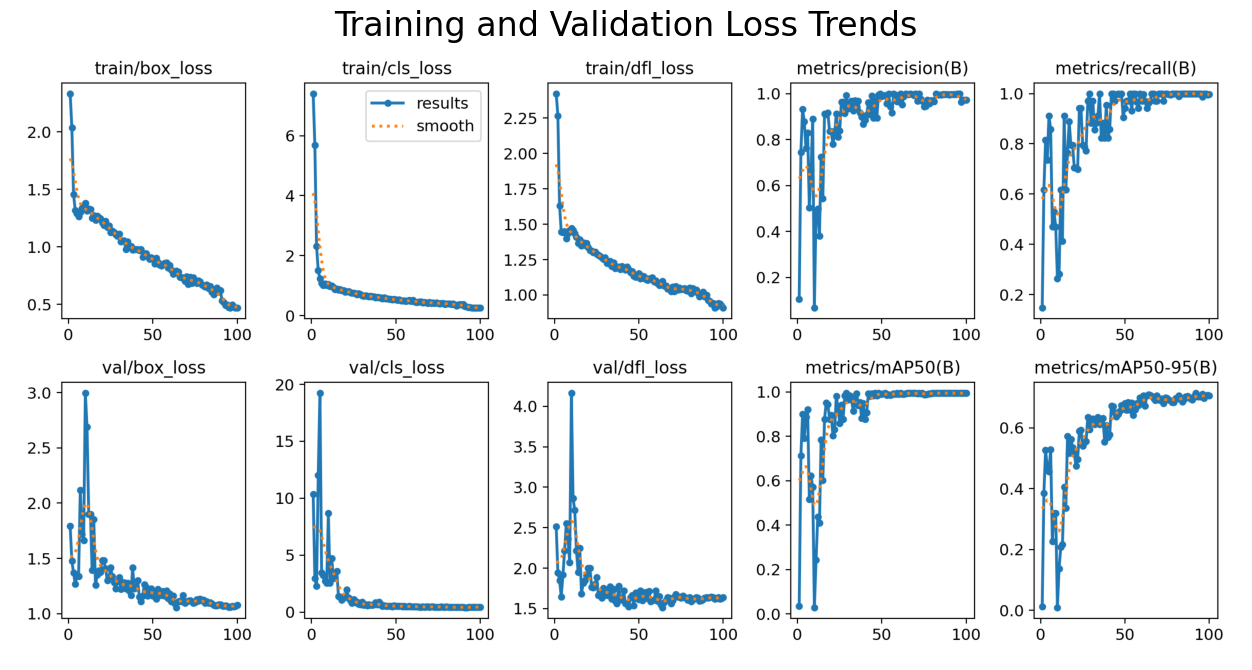

In [11]:
results_file_path = os.path.join(post_training_files_path, 'results.png')

# чтение фотки файла csv
image = cv2.imread(results_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# показ
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title('Training and Validation Loss Trends', fontsize=24)
plt.axis('off') 
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

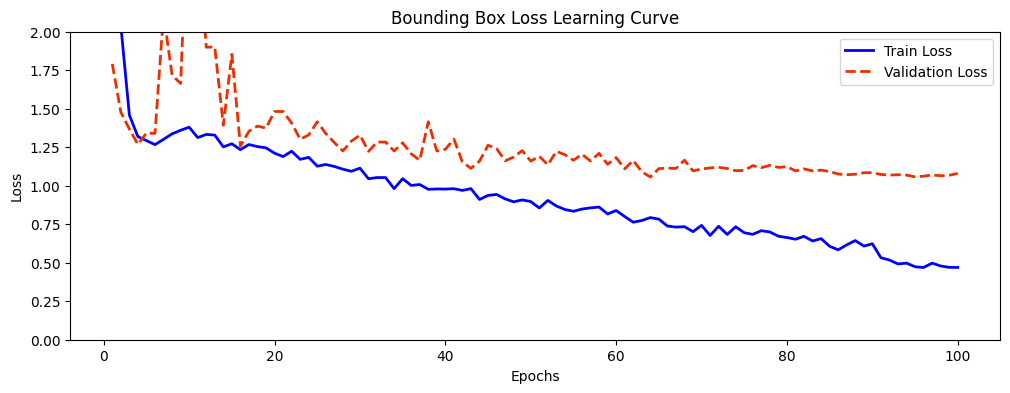

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

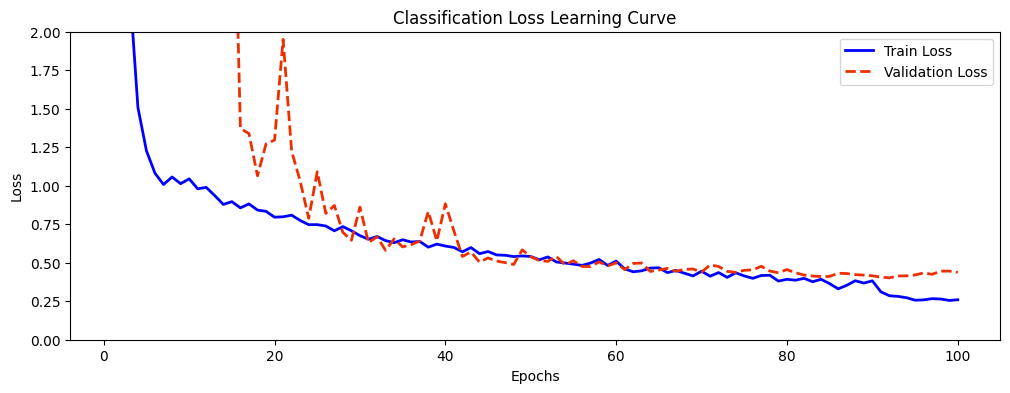

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

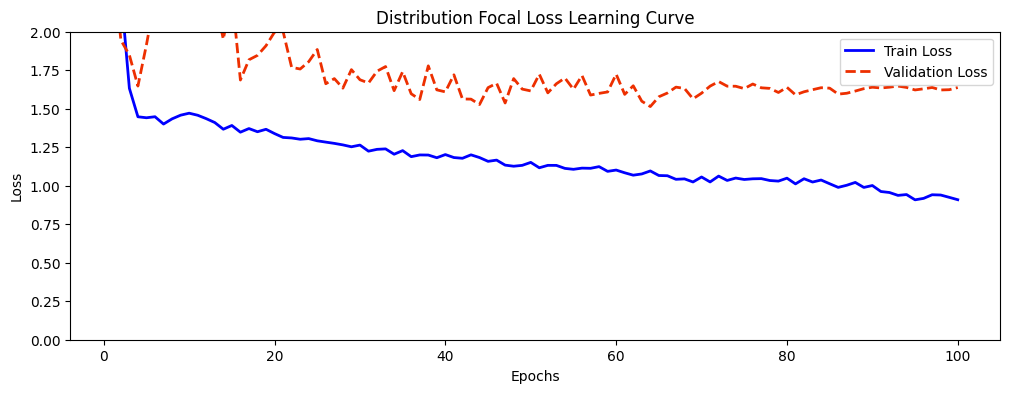

In [12]:
def plot_learning_curve(df, train_loss_col, val_loss_col, title, ylim_range=[0,2]):
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='blue', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='#ed2f00', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(ylim_range)
    plt.legend()
    plt.show()
    

# Создание полного пути к файлу "results.csv", используя путь к каталогу и имя файла
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Загрузка CSV-файла по созданному пути в pandas
df = pd.read_csv(results_csv_path)

# Удаление всех начальных пробелов из имен столбцов
df.columns = df.columns.str.strip()

# Построение кривых обучения для каждой потери
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Bounding Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')


image 1/1 /kaggle/input/9-november/train/images/4_JPG.rf.9510d345266465638da12569b815fbc0.jpg: 640x640 2 train- ..-train-imagess, 16.2ms
Speed: 3.4ms preprocess, 16.2ms inference, 158.2ms postprocess per image at shape (1, 3, 640, 640)
Объектов обнаружено: 2


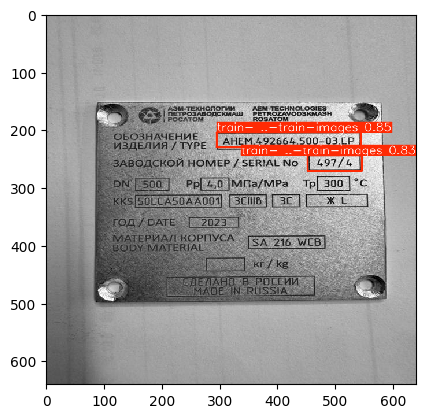

Сохранено обрезанное изображение: cropped_bbox_0.jpg
Сохранено обрезанное изображение: cropped_bbox_1.jpg
Bounding boxes: [[420.08880615234375, 217.60137939453125, 249.767333984375, 25.381103515625], [499.93505859375, 258.1241455078125, 94.0269775390625, 27.419540405273438]]


In [13]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

def crop_by_bboxes(image_path, bboxes):
    """
    Обрезка и сохранение изображений по bounding boxes.

    :param image_path: str - Путь к изображению
    :param bboxes: list - Список bounding boxes в формате (центр x, центр y, ширина, высота)
    """
    # Загрузить изображение
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Не удалось загрузить изображение.")

    # Пройтись по каждому bounding box
    for i, (cx, cy, w, h) in enumerate(bboxes):
        # Преобразование координат из (центр x, центр y, ширина, высота) в (x1, y1, x2, y2)
        x1 = int(cx - w / 2)
        y1 = int(cy - h / 2)
        x2 = int(cx + w / 2)
        y2 = int(cy + h / 2)
        
        # Проверка выхода за пределы изображения
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(image.shape[1], x2)
        y2 = min(image.shape[0], y2)

        # Обрезать изображение по координатам
        cropped_image = image[y1:y2, x1:x2]
        
        # Преобразовать обрезанное изображение в формат PIL и сохранить как новый файл
        cropped_pil_image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        cropped_pil_image.save(f"cropped_bbox_{i}.jpg")
        print(f"Сохранено обрезанное изображение: cropped_bbox_{i}.jpg")

# Инициализация YOLO модели
new_model = YOLO('/kaggle/input/model/pytorch/default/1/09-november.pt')
img_path = '/kaggle/input/9-november/train/images/4_JPG.rf.9510d345266465638da12569b815fbc0.jpg'
# img_path = '/kaggle/input/9-november/valid/images'

# Запуск предсказания
results = new_model.predict(source=img_path, iou=0.5, conf=0.4)
for i in results:
    count = len(i.boxes)
    bboxes = i.boxes.xywh.tolist()  # Список боксов в формате (центр x, центр y, ширина, высота)
    print(f"Объектов обнаружено: {count}")
    
    # # Отображение изображения с обнаруженными объектами
    array = i.plot()
    plt.imshow(array, interpolation='nearest')
    plt.show()
    
    # # Обрезка и сохранение каждого обнаруженного bounding box
    crop_by_bboxes(img_path, bboxes)
    print("Bounding boxes:", bboxes)